# Perceptron - Support Vector Machines (SVM)


In this notebook we will examine two traditional classification methods side-by-side: the Perceptron, and Support Vector Machines (SVM).


## Brief introduction

Perceptron constitutes one of the oldest supervised learning algorithms for binary classification. Given a set of 2 classes and a set of pre-classified instances (samples), the task of binary classifiers is to train models that will indicate which of these two classes best represent an unknown instance.


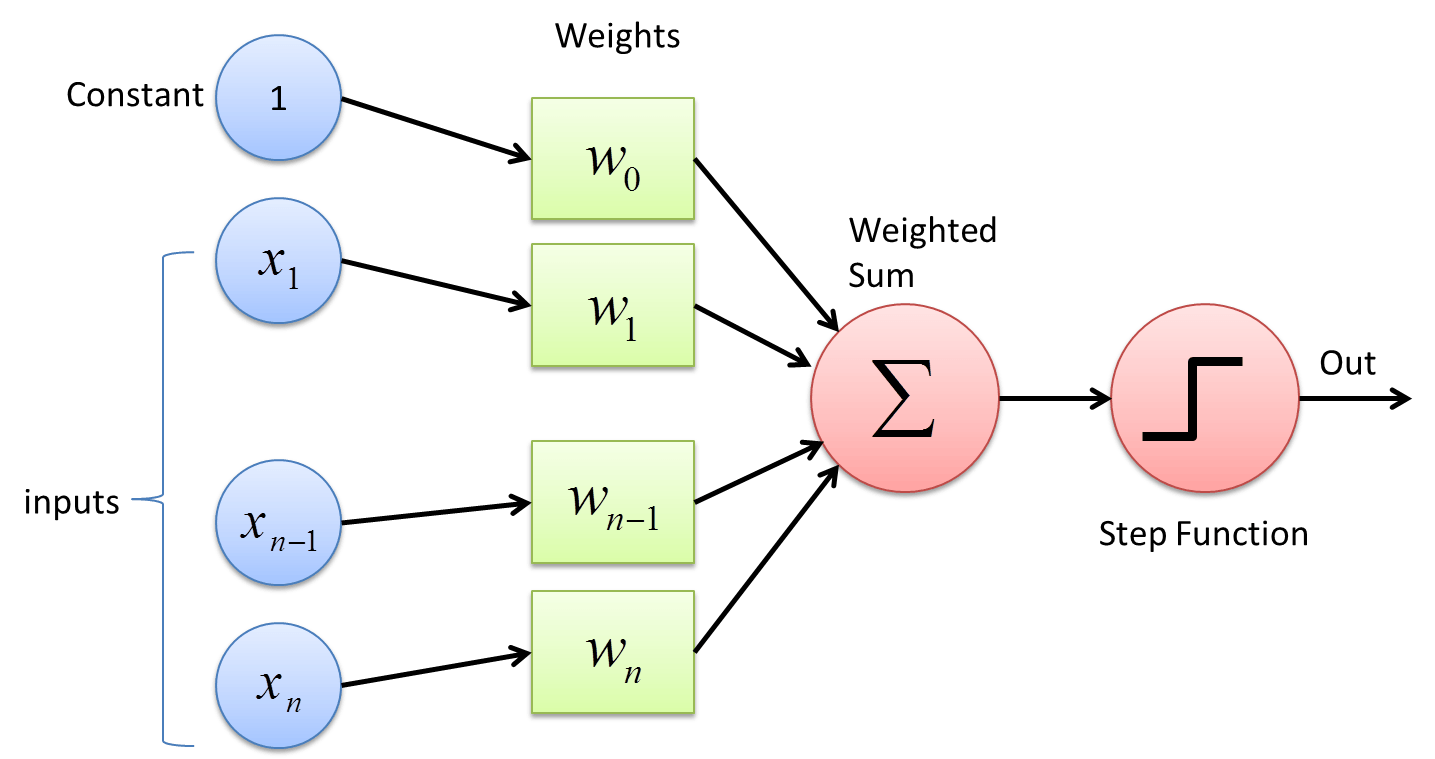

In [1]:
from IPython.display import Image
Image(filename='perceptron.png', width=400)


The Perceptron is (was) one of the fundamental building blocks in early neural networks. More specifically, a number interconnected Perceptrons played the role of neurons in the network. A Perceptron consists of four main parts including input values, weights and bias, net sum, and an activation (step) function.

The learning procedure is initiated by multiplying the input variables by their respective weights. Then, all these products are accummulated to create a weighted sum. The weighted sum is then passed as an argument to the activation function, producing the perceptron's output. The activation function plays the integral role of ensuring the output is mapped between required values such as $(0,1)$ or $(-1,1)$. It is important to note that the weight of an input is indicative of the strength of a node. Similarly, an input's bias value gives the ability to shift the activation function curve up or down.

On the other hand, SVM is a powerful classification method that is considered to be an extension of the Perceptron.

Using the Perceptron algorithm, we minimize misclassification errors. However, in SVMs our optimization objective is to maximize the margin (that is, the distance) between the separating hyperplane (decision boundary) and the training examples that are closest to this hyperplane. These training examples are the so-called support vectors.


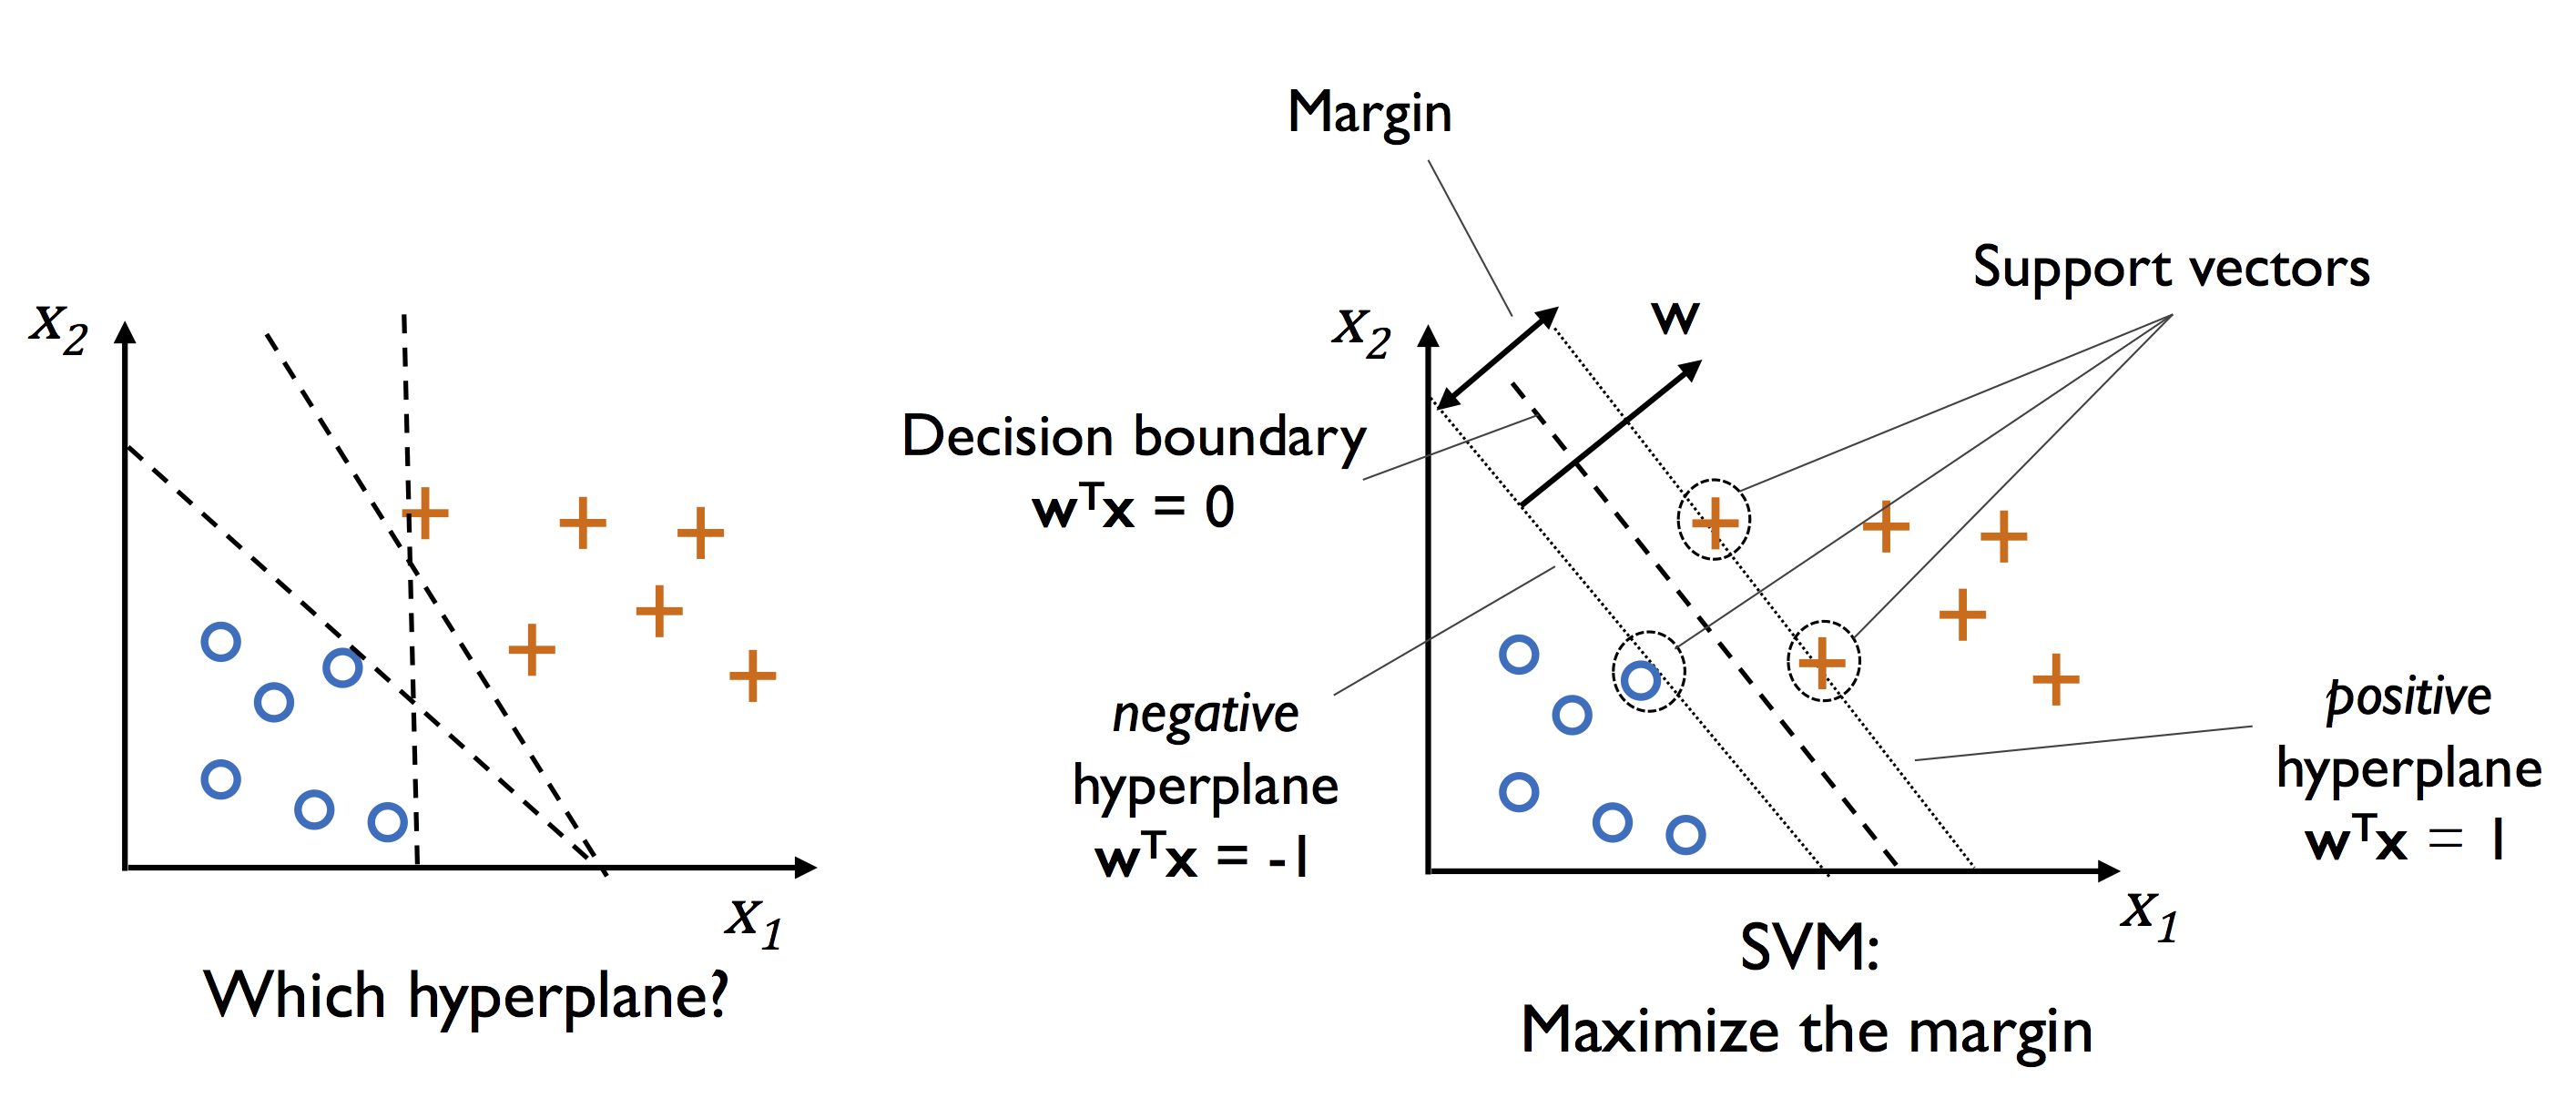

In [2]:
Image(filename='svm.png', width=700) 


## The IRIS Dataset

The [IRIS dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) is one of the most common datasets in the pattern recognition and classification literature. It includes 150 examples (instances) that represent flowers of 3 types (classes): Iris-Setosa, Iris-Versicolor, and Iris-Virginica. The dataset is balanced, that is, it contains 50 instances for each of these types.

Each flower instance is described by exactly four characteristics (features):

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm

Consequently, each row (instance) in the dataset includes five columns. The first four concern the four aforementioned features, whereas the fifth one is the (integer-encoded) class of the flower:

0. for Iris-Setosa,
1. for Iris-Versicolor, and
2. for Iris-Virginica.

One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

The [IRIS dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) is a member of the `datasets` library of scikit-learn. We can easily load it up by calling `datasets.load_iris()`:


In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
dataset = load_iris()


Let's look at the official description of the dataset. This description provides information on the number of samples (150) their characteristics (4), and their class labels (3).


In [4]:
# Display a description of the dataset: 4 features, 150 samples, 3 classes.
# print(dataset.DESCR)


Now let us examine the names and the values of input variables (or, the features) of the dataset. We begin with the names:


In [5]:
# Display the names of the 4 features of the dataset.
print(dataset.feature_names)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
# Display the values of the 4 features of the dataset (shape: 150 x 4).
# print(dataset.data)


Below we print the the target variables (that is, the flower types) of the 150 samples of the dataset. This is a classification problem. In such types of problems, we usually refer to the target variables as class labels. According to the information printed below, 0 represents the Iris-Setosa class, whereas 1 and 2 are used for Iris-Versicolor and Iris-Virginica respectively.


In [7]:
# Print the values of the target variables (i.e. the class labels of the 150 flowers)
print(dataset.target)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Perceptron and SVM with a single input variable

We begin our analysis by choosing a subset of the features of the IRIS dataset. At first, why don't we apply our classifiers directly to all of them?

* For educational purposes: We desire to visualize the results and this is only possible with one or two features.
* For practical reasons: In large datasets with a large number of dimensions there is a risk of encountering the curse of dimensionality (not here).

The entire dataset will be fed to the Perceptron and SVM models at the last part of this notebook. For the moment, we will create four independent subsets of the original input variables that reside in the `dataset.data` list. Each subset will include only one feature; the rest 3 features will be discarded.


### Training and testing the models

Similarly to [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), scikit-learn also includes an implementation of the [Perceptron linear classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) Its most important parameters include:

* `fit_intercept`: Whether to calculate the intercept for this model. If set to `False`, no intercept will be used in calculations (i.e. data is expected to be centered).
* `n_jobs`: The number of jobs to use for the computation. This will only provide speedup in case of sufficiently large problems.
* `penalty`: Determines the regularization term (namely L1, L2, or None).
* `max_iter`: The maximum number of passes over the training data (aka epochs).
* `shuffle`: Whether or not the training data should be shuffled after each epoch.

Regarding [Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html), scikit-learn includes three implementations: [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) and [NuSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html) are similar methods, but they accept slightly different sets of parameters. On the other hand, [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) is another (faster) implementation of Support Vector Classification for the case of a linear kernel. Note that `LinearSVC` does not accept the `kernel` parameter, as this is assumed to be linear.

In this notebook we will use [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), because it can accept different types of kernels; therefore, it is suitable for handling both linear, and non-linear data distributions. Its most important properties are:

* `kernel{'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}, default='rbf'`: Specifies the kernel type to be used in the algorithm. It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or a callable. If none is given, 'rbf' will be used. 
* `max_iter`: Hard limit on iterations within solver, or -1 for no limit.
* `decision_function_shape{'ovo', 'ovr'}, default='ovr'`: Whether to return a one-vs-rest ('ovr') decision function as all other classifiers, or the original one-vs-one decision function of libsvm.

In parallel, we will also train an equal number of Logistic Regression models, to compare it with our Perceptron and SVM classifiers.

The following function `plot_decision_regions_2D` plots two-dimensional feature spaces and decision boundaries. It can be used only for input datasets with two features. In this context, one-dimensional datasets are also supported by setting the value of the second feature equal to zero.


In [8]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# Plot 2 dimensional spaces and decision boundaries
def plot_decision_regions_2D(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'o', 'v', '^')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
    x2_min, x2_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
    
    # meshgrid: Return coordinate matrices from coordinate vectors. More specifically, we make N-D coordinate arrays
    # for vectorized evaluations of N-D scalar/vector fields over N-D grids, given one-dimensional coordinate arrays.
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # ravel: Return a contiguous flattened array.
    # T: the transpose matrix
    X_test = np.array([xx1.ravel(), xx2.ravel()]).T
    # print(X_test)

    Z = classifier.predict(X_test)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


`TrainTestClassifier` is a flexible function for training and testing variable classifiers. Its arguments are:

* `C`: The classifier to train and test.
* `X`: The input variables.
* `Y`: The class labels (target variables).
* `f_names`: A tuple with the names of the features. These names will be used as labels of the axes of the produced plots. This is only applicable to two dimensional input spaces, where we have two features.


In [9]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

def TrainTestClassifier(C, X, Y, f_names):
    # Split the dataset into a training and a test set. The sizes of the test and training sets will be the 30% and 70%
    # of the original dataset, respectively.
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

    if C == "LogReg":
        Classifier = LogisticRegression() # Create a Logistic Regression model.
    elif C == "Perceptron":
        Classifier = Perceptron()         # Create a Perceptron classfier.
    elif C == "SVM":
        Classifier = SVC(kernel = 'linear', C = 1.0, random_state = 1) # Create an SVM model with linear kernel

    Classifier.fit(X_train, Y_train)
    Y_pred = Classifier.predict(X_test)

    accuracy = accuracy_score(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)

    # X_stacked = np.vstack((X_train, X_test))
    # Y_stacked = np.hstack((Y_train, Y_test))

    X_stacked = X_test
    Y_stacked = Y_test

    dimensions = X.shape[1]

    # 2-D plots will be displayed only for 2-dimensional input spaces (that is, when we have 2 features)
    if (dimensions == 1 or dimensions == 2):
        plot_decision_regions_2D(X_stacked, Y_stacked, Classifier)
        plt.xlabel(f_names[0])
        plt.ylabel(f_names[1])
        plt.title(C + " (Accuracy: " + (str)(round(accuracy, 3)) + ", MSE: " + (str)(round(mse, 3)) + ")")
        plt.legend(loc='upper left')

    return [C, mse, accuracy ]


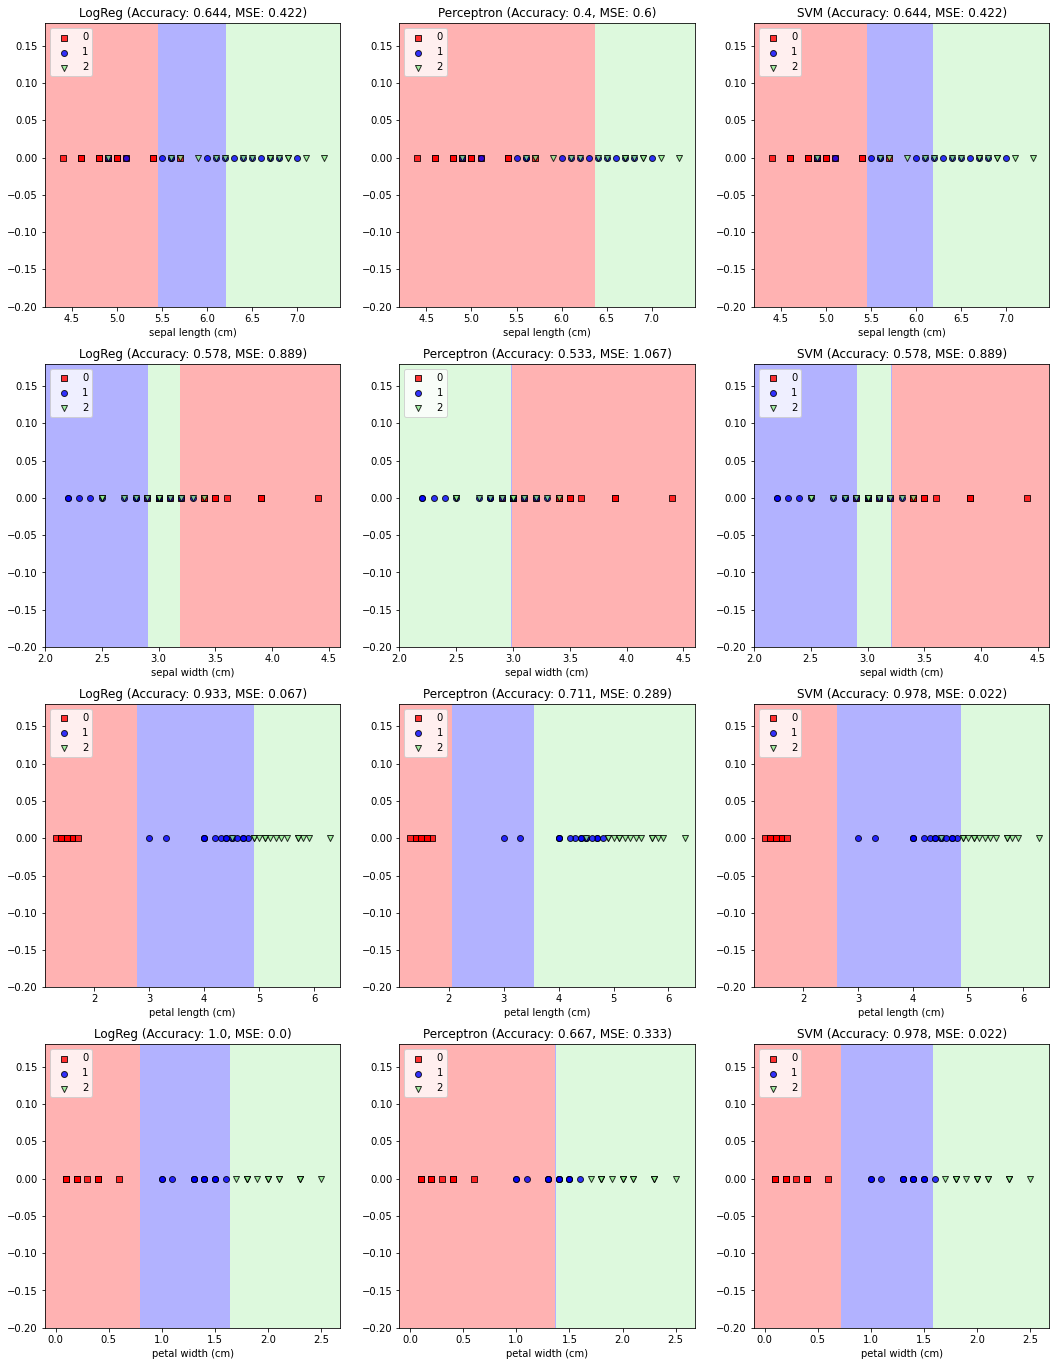

In [10]:
import pandas as pd
pd.set_option("display.precision", 3)

fig = plt.figure(figsize=(18, 24))

Y = np.array(dataset.target)
X = np.array(dataset.data)

# For each feature in the dataset
itr = 0
for i in range( len(dataset.feature_names) ):
    f0 = X[ :, i:(i + 1) ]  # Isolate the desired column (i.e., feature) by slicing X and storing the result in f0.

    # As mentioned earlier, plot_decision_regions_2D illustrates two-dimensional feature spaces. For this reason, we
    # concatenate our single feature array f0 (shape: 150 x 1) with another array (also of shape 150 x 1) that has all its
    # elements equal to zero. The resulting f array has a shape 150 x 2, where the elements of the second column are all 0.
    f = np.concatenate( (f0, np.zeros(f0.shape)  ), axis=1)

    # Multiple calls to TrainTestClassifier for the f feature: Logistic Regression, Perceptron, and SVM
    itr = itr + 1
    plt.subplot(4, 3, itr)
    TrainTestClassifier("LogReg", f, Y, (dataset.feature_names[i], ""))

    itr = itr + 1
    plt.subplot(4, 3, itr)
    TrainTestClassifier("Perceptron", f, Y, (dataset.feature_names[i], ""))

    itr = itr + 1
    plt.subplot(4, 3, itr)
    TrainTestClassifier("SVM", f, Y, (dataset.feature_names[i], ""))


Notice that our single-featured samples are all placed on a straight line (one-dimensional space) that lies on the horizontal axis (that is, $y = 0$). The color of a marker denotes the real class of its respective sample. Moreover, the colored areas represent the predicted classes, or else, the sub-areas of the input space that have been separated by the decision boundaries of each classifier.

For example, all the samples that lie on the pink area have been assigned the class 0 (Iris-Setosa) by the classfier. If the point is red, then the classification was correct. To generalize, a classification is correct only when a marker is placed on an area that has the same color; otherwise, the sample is considered as misclassified.


## Perceptron and SVM with two input variables

Now we will try the aforementioned models on all 6 possible pairs of features:


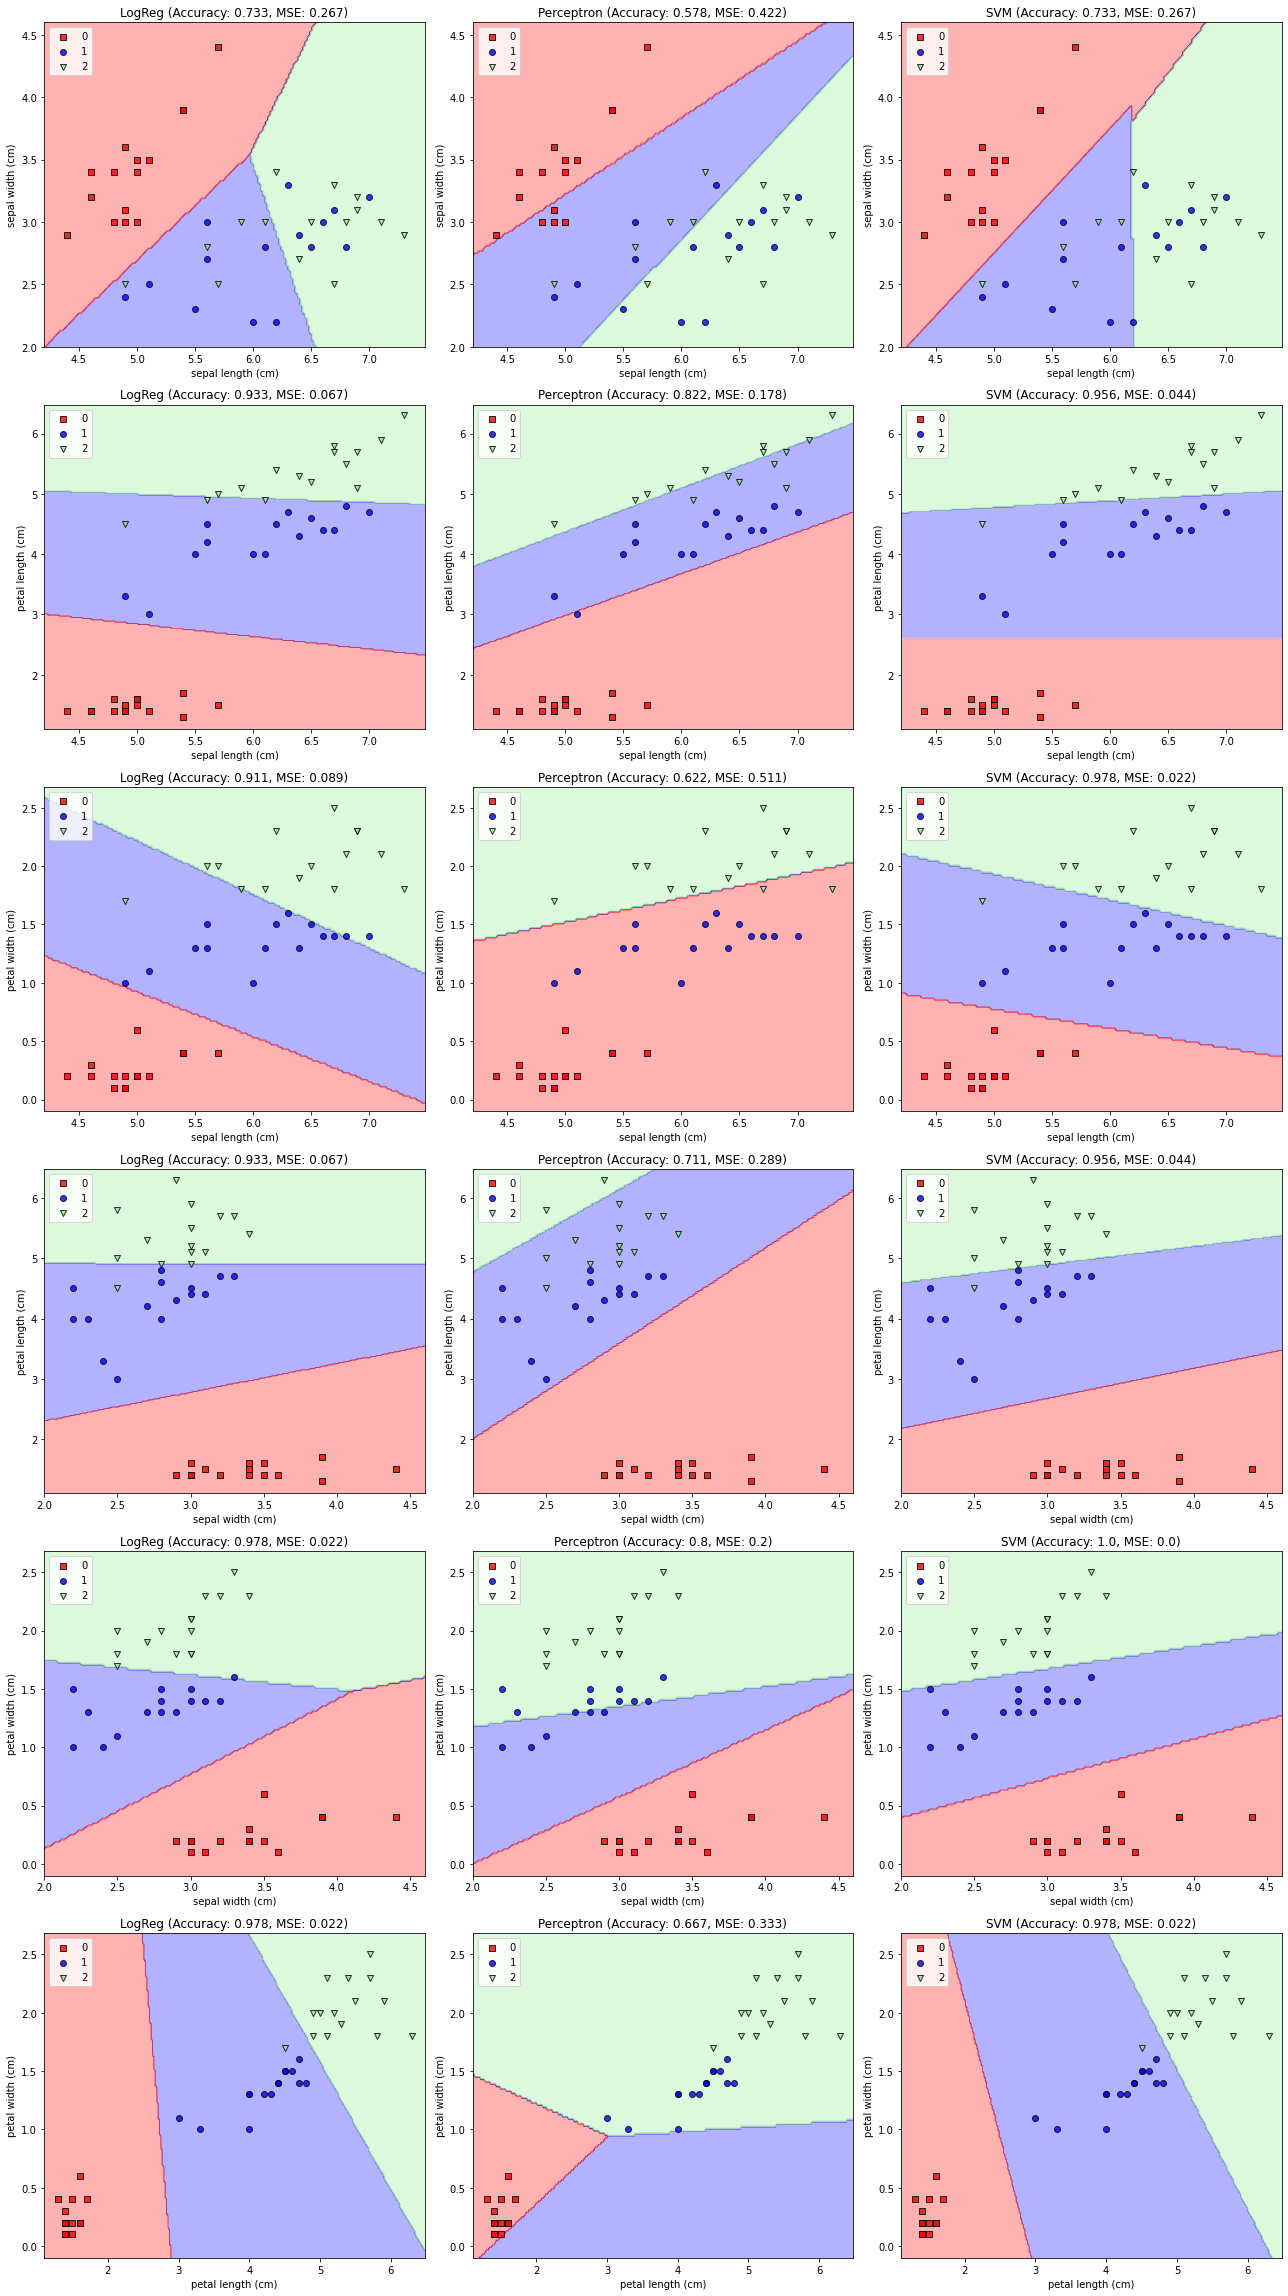

In [11]:
fig = plt.figure(figsize=(18, 32))

Y = np.array(dataset.target)
X = np.array(dataset.data)

# Plot counter
itr = 0

# For each feature in the dataset
for i in range( len(dataset.feature_names) ):
    ff = X[ :, i:(i + 1) ]      # Isolate the desired column (i.e., feature) by slicing X and storing the result in ff.

    for j in range( i + 1, len(dataset.feature_names) ):
        sf = X[ :, j:(j + 1) ]  # Isolate the desired column (i.e., feature) by slicing X and storing the result in sf.

        f = np.concatenate((ff, sf), axis = 1)  # Concatenate the two features into a two-column NumPy array

        itr = itr + 1
        plt.subplot(6, 3, itr)
        TrainTestClassifier("LogReg", f, Y, (dataset.feature_names[i], dataset.feature_names[j]))

        itr = itr + 1
        plt.subplot(6, 3, itr)
        TrainTestClassifier("Perceptron", f, Y, (dataset.feature_names[i], dataset.feature_names[j]))

        itr = itr + 1
        plt.subplot(6, 3, itr)
        TrainTestClassifier("SVM", f, Y, (dataset.feature_names[i], dataset.feature_names[j]))

plt.tight_layout()
plt.show()


## Perceptron and SVM with all input variables

Now let us attempt to train classification models by taking into consideration all the features of the dataset. Surprisingly, all classifiers exhibit exactly the same performance.


In [12]:
Y = np.array(dataset.target)
X = np.array(dataset.data)

RESULTS = []
RESULTS.append(TrainTestClassifier("LogReg", X, Y, ("", "")))
RESULTS.append(TrainTestClassifier("Perceptron", X, Y, ("", "")))
RESULTS.append(TrainTestClassifier("SVM", X, Y, ("", "")))

df_results = pd.DataFrame(RESULTS, columns=["Classifier", 'MSE', 'Accuracy'])
display(df_results)


,Classifier,MSE,Accuracy
0,LogReg,0.022,0.978
1,Perceptron,0.022,0.978
2,SVM,0.022,0.978


## Exercises

1. In the examples above, compute (and draw) the support vectors of the SVM models.
2. Compare the three classifiers (Logistic Regression, Perceptron and SVM) on the [Wisconsin breast cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) dataset of scikit-learn. What is their performance if we use one, two, and all the available features?
